# Tidy Survey

This document exhibit the process of cleaning and organizing survey data. First, let's load some packages.

In [24]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
from code.survey_processor import *

plt.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**The data processing methods are written as class funciton.** This file also shows my logic behind compsing the class script. 

### 1. read data.

In [72]:
survey = survey('data/survey')

### 2. simplify column labels and filter population of interest

In [73]:
survey.rough_process()

In [5]:
df = survey.data.copy()

### 3. Check string asnwers in numeric features. Label string as nan, then do t-test. If the p value from t-test is significant, then dummie string as boolean variable, otherwise impute string with median. 

In [6]:
bs = ['Not applicable', 'No answer', "Don't know" ]

In [7]:
num_cols = ['sphrs1','agekdbrn','paeduc','maeduc','speduc']

In [8]:
check_impute(df,num_cols,df.employed,bs)

defaultdict(float,
            {'agekdbrn': 0.80652824893845687,
             'maeduc': 1.5957833915685355e-09,
             'paeduc': 0.00080774247657822325,
             'speduc': 0.030287323494609907,
             'sphrs1': 0.45803397978756955})

sphrs1 and agekdbrn can be imputed with median. However, string answers in maeduc, paeduc and speduc are not imputable. now let's take a look into these features.

BS ratio: 0.151198934281
BS number: 681


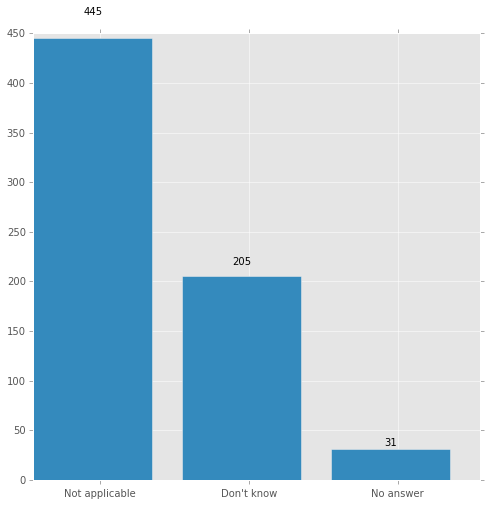

In [9]:
check_bs(df.maeduc,bs)

In [12]:
from collections import defaultdict
import pdb

def check_each(df,col,target = "employed",bs = ['Not applicable', 'No answer', "Don't know" ]):
    temp_df = pd.concat([df[col],df[target]],axis = 1)
    numbs = temp_df[col].replace(bs,np.nan).unique()
    for b in bs:
        d2 = temp_df[temp_df[col].apply(lambda x: x==b or x in numbs)]
        d2[col].replace(b,np.nan,inplace = True)
        p = ttest_by(d2[target],pd.isnull(d2[col]))[1]
        print b,p

            

In [13]:
check_each(df,'maeduc')

/Users/yleng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/yleng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
/Users/yleng/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Not applicable 0.00100165855609
No answer 0.857729540015
Don't know 3.34846805323e-11


**This result indicated that we can impute "no answer" in "maeduc" column.**

BS ratio: 0.331039076377
BS number: 1491


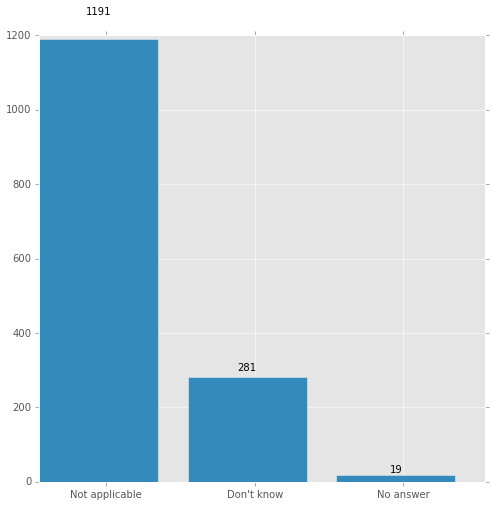

In [14]:
check_bs(df.paeduc,bs)

In [15]:
check_each(df,"paeduc")

Not applicable 0.0307036670413
No answer 0.818306252525
Don't know 4.24835727965e-05


/Users/yleng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/yleng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


** same, impute "No answer" in "paeduc" column **

BS ratio: 0.472246891652
BS number: 2127


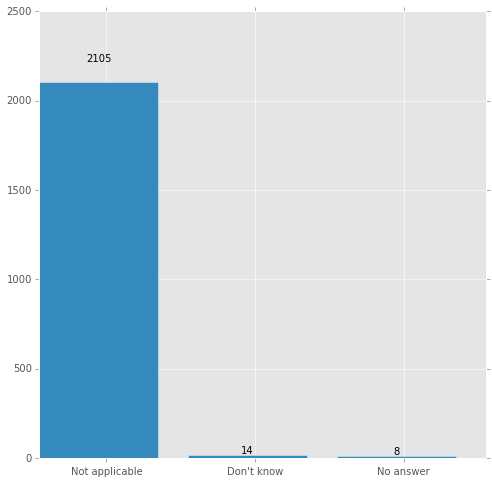

In [16]:
check_bs(df.speduc,bs)

In [17]:
check_each(df,"speduc")

Not applicable 0.0320944460559
No answer 0.456107939937
Don't know 0.222561771638


/Users/yleng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/yleng/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


** impute "No answer" and "Don't know" in "speduc" column**

In [64]:
from code.survey_processor import *

In [65]:
sv = survey('data/survey')

In [66]:
sv.processor()

In [67]:
sv.data.columns

Index([u'sphrs1', u'agekdbrn', u'maeduc', u'maeduc_not_app', u'maeduc_dn_kwn',
       u'paeduc', u'paeduc_not_app', u'paeduc_dn_kwn', u'speduc',
       u'speduc_not_app', u'age', u'degree', u'mawrkgrw', u'incom16',
       u'natspac', u'nateduc', u'natarms', u'natfare', u'natsoc', u'natpark',
       u'natfarey', u'eqwlth', u'colath', u'colcom', u'spkhomo', u'affrmact',
       u'wrkwayup', u'hapmar', u'helpful', u'conbus', u'coneduc', u'conlabor',
       u'thnkself', u'workhard', u'helpoth', u'satjob', u'richwork', u'class_',
       u'satfin', u'finrela', u'getahead', u'kidssol', u'fepol', u'fechld',
       u'fepresch', u'fefam', u'helpsick', u'discaff', u'fejobaff',
       u'discaffm', u'discaffw', u'goodlife', u'meovrwrk', u'realinc',
       u'employed'],
      dtype='object')

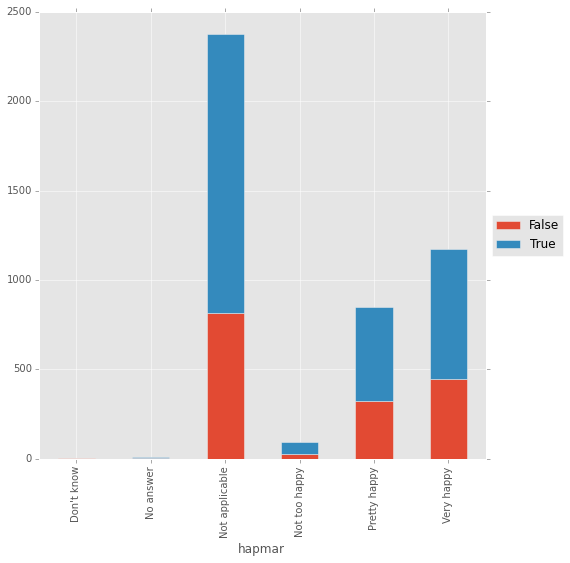

In [38]:
stack_bar(sv.data.hapmar,sv.data.employed)


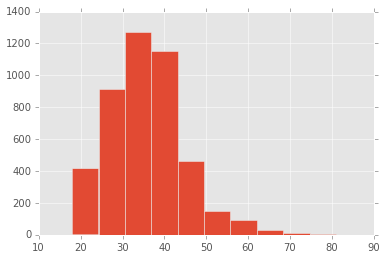

In [69]:
sv.data.age.hist()

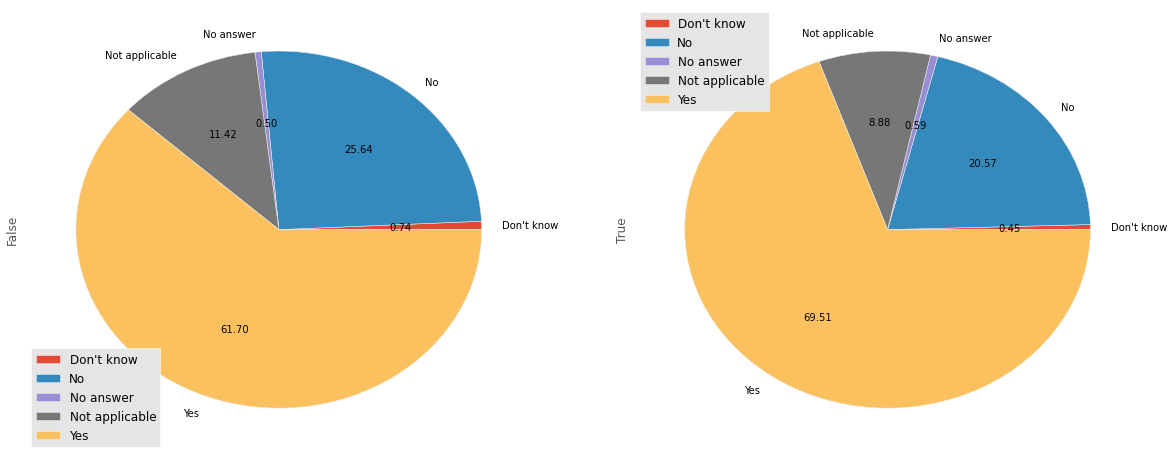

In [77]:
pie_chart(sv.data.employed, sv.data.mawrkgrw)